In [3]:
# Imports and Setup

import numpy as np
import matplotlib.pyplot as plt
import batman
import emcee
import corner

/home/sid/anaconda3/lib/python3.12/site-packages/arviz/__init__.py:39: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


In [4]:
# RV Data

t_rv = np.array([
    56808.4537, 56809.3954, 56810.4489, 56811.4723, 56812.4370,
    56814.3886, 56828.4083, 56829.4019, 56830.4209,
    56856.3802, 56858.3932, 56868.4157, 56870.3629, 56897.4126,
    56899.3859, 56900.3450, 56922.3090, 56932.2772,
    56933.2939
])

rv = np.array([
    -32.017, -32.678, -32.488, -32.010, -32.359,
    -32.102, -32.137, -32.115, -32.651,
    -32.040, -32.653, -32.439, -32.052, -32.532,
    -32.246, -32.663, -32.128, -32.358,
    -31.987
])

rv_err = np.array([
    0.013, 0.010, 0.011, 0.009, 0.019,
    0.010, 0.009, 0.010, 0.009,
    0.010, 0.030, 0.014, 0.009, 0.022,
    0.008, 0.008, 0.008, 0.010,
    0.010
])

In [5]:
# Transit Data

t_transit = np.array([
    -6.87055556e-02, -6.80111111e-02, -6.73166667e-02, -6.66222222e-02,
    -6.59277778e-02, -6.52333333e-02, -6.45388889e-02, -6.38444444e-02,
    -6.31500000e-02, -6.24555556e-02, -6.17611111e-02, -6.10666667e-02,
    -6.03722222e-02, -5.96777778e-02, -5.89833333e-02, -5.82888889e-02,
    -5.75944444e-02, -5.69000000e-02, -5.62055556e-02, -5.55111111e-02,
    -5.48166667e-02, -5.41222222e-02, -5.34277778e-02, -5.27333333e-02,
    -5.20388889e-02, -5.13444444e-02, -5.06500000e-02, -4.99555556e-02,
    -4.92611111e-02, -4.85666667e-02, -4.71777778e-02, -4.64833333e-02,
    -4.57888889e-02, -4.50944444e-02, -4.44000000e-02, -4.37055556e-02,
    -4.30111111e-02, -4.23166667e-02, -4.09277778e-02, -4.02333333e-02,
    -3.95388889e-02, -3.88444444e-02, -3.81500000e-02, -3.74555556e-02,
    -3.67611111e-02, -3.60666667e-02, -3.53722222e-02, -3.46777778e-02,
    -3.39833333e-02, -3.32888889e-02, -3.25944444e-02, -3.19000000e-02,
    -3.12055556e-02, -3.05111111e-02, -2.98166667e-02, -2.91222222e-02,
    -2.84277778e-02, -2.77333333e-02, -2.70388889e-02, -2.63444444e-02,
    -2.56500000e-02, -2.49555556e-02, -2.42611111e-02, -2.35666667e-02,
    -2.28722222e-02, -2.21777778e-02, -2.14833333e-02, -2.07888889e-02,
    -2.00944444e-02, -1.94000000e-02, -1.87055556e-02, -1.80111111e-02,
    -1.73166667e-02, -1.66222222e-02, -1.59277778e-02, -1.52333333e-02,
    -1.45388889e-02, -1.38444444e-02, -1.31500000e-02, -1.24555556e-02,
    -1.17611111e-02, -1.10666667e-02, -1.03722222e-02, -9.67777778e-03,
    -8.98333333e-03, -8.28888889e-03, -7.59444444e-03, -6.90000000e-03,
    -6.20555556e-03, -5.51111111e-03, -4.12222222e-03, -3.42777778e-03,
    -2.73333333e-03, -2.03888889e-03, -1.34444444e-03, -6.50000000e-04,
     4.44444444e-05,  7.38888889e-04,  1.43333333e-03,  2.12777778e-03,
     2.82222222e-03,  3.51666667e-03,  4.21111111e-03,  4.90555556e-03,
     5.60000000e-03,  6.29444444e-03,  6.98888889e-03,  8.37777778e-03,
     9.07222222e-03,  9.76666667e-03,  1.04611111e-02,  1.11555556e-02,
     1.18500000e-02,  1.25444444e-02,  1.32388889e-02,  1.39333333e-02,
     1.46277778e-02,  1.53222222e-02,  1.60166667e-02,  1.74055556e-02,
     1.81000000e-02,  1.87944444e-02,  1.94888889e-02,  2.01833333e-02,
     2.08777778e-02,  2.15722222e-02,  2.22666667e-02,  2.29611111e-02,
     2.36555556e-02,  2.43500000e-02,  2.50444444e-02,  2.57388889e-02,
     2.64333333e-02,  2.71277778e-02,  2.78222222e-02,  2.85166667e-02,
     2.92111111e-02,  2.99055556e-02,  3.06000000e-02,  3.19888889e-02,
     3.26833333e-02,  3.33777778e-02,  3.40722222e-02,  3.47666667e-02,
     3.54611111e-02,  3.61555556e-02,  3.68500000e-02,  3.75444444e-02,
     3.82388889e-02,  3.89333333e-02,  3.96277778e-02,  4.03222222e-02,
     4.10166667e-02,  4.17111111e-02,  4.24055556e-02,  4.31000000e-02,
     4.37944444e-02,  4.44888889e-02,  4.51833333e-02,  4.58777778e-02,
     4.65722222e-02,  4.72666667e-02,  4.79611111e-02,  4.86555556e-02,
     4.93500000e-02
], dtype=float)

flux = np.array([
    0.98565958, 0.99294373, 0.99283377, 1.00110954, 0.99552327, 0.99949106,
    0.99848596, 1.0014552, 1.0028573, 1.00595446, 0.9977488, 0.99942303,
    1.0026337, 1.00407008, 1.00264337, 0.99919573, 1.00199523, 0.9943241,
    1.00765569, 0.99834167, 1.00389142, 1.00000000, 0.99977382, 1.00224629,
    1.00026529, 0.99739785, 0.99669758, 0.99441057, 1.00280865, 1.00252988,
    1.00375521, 0.99373792, 1.00211985, 1.01614583, 1.00722094, 0.99963354,
    0.99528024, 0.99796293, 1.0053005, 0.99107308, 1.00247087, 1.01160412,
    0.99089096, 0.99016866, 1.01934792, 1.02629287, 1.02680795, 1.00363327,
    0.99734383, 1.00570734, 1.00953893, 1.00410276, 0.99945755, 0.99969289,
    0.99820432, 1.01823947, 0.99850833, 0.98040795, 0.9950947, 1.0004017,
    1.00016283, 0.9953027, 0.99000282, 0.99240342, 0.98985784, 0.98341506,
    0.98909382, 0.98702951, 0.98067519, 0.98434236, 0.98057561, 0.9807762,
    0.98454634, 0.98292108, 0.9832969, 0.98550577, 0.9828966, 0.98104564,
    0.98709135, 0.97618139, 0.976782, 0.97641691, 0.97946535, 0.97933727,
    0.9813836, 0.98441259, 0.98411459, 0.97693733, 0.98177496, 0.97954062,
    0.9776129, 0.97902981, 0.98163362, 0.9767756, 0.97896485, 0.98231251,
    0.9774755, 0.98088453, 0.98016232, 0.9837939, 0.9805808, 0.97953527,
    0.97906063, 0.98304494, 0.98259267, 0.98137292, 0.97995037, 0.98019567,
    0.97203622, 0.9820914, 0.97804314, 0.98382851, 0.9845088, 0.98155105,
    0.98629437, 0.98422774, 0.98571121, 0.97918831, 0.98104018, 0.98048009,
    0.98445121, 0.98491926, 0.97934652, 0.98671671, 0.98417909, 0.9850176,
    0.98627332, 0.98974177, 0.98987093, 0.99096602, 0.99488406, 0.99603385,
    1.00450302, 0.998701, 1.006723, 0.99468214, 1.00032826, 0.99900843,
    1.0007451, 0.99018273, 0.99916748, 1.00204695, 0.99794204, 0.99838699,
    0.99674375, 0.99437468, 0.99755854, 0.99796343, 0.99876238, 1.00102638,
    1.00320181, 1.00086334, 1.00836473, 0.99856618, 1.00106983, 0.99021676,
    0.99299954, 0.99611338, 1.00162565, 0.99626099, 0.99553622, 1.00475482,
    1.00002388, 1.01601451, 0.99809844
], dtype=float)

ferr = np.array([
    0.00752913, 0.0061602, 0.00570249, 0.00568808, 0.00574365, 0.00521369,
    0.00512145, 0.00507449, 0.00508134, 0.00527426, 0.00497687, 0.00498127,
    0.00496913, 0.00508605, 0.00502898, 0.00503745, 0.01188652, 0.00591628,
    0.00507214, 0.00503798, 0.00503004, 0.00525591, 0.0050367, 0.00559522,
    0.00503979, 0.00528303, 0.00508291, 0.00526126, 0.00547977, 0.00511062,
    0.00504707, 0.00527517, 0.00582392, 0.00875883, 0.00516443, 0.0061101,
    0.00725447, 0.00666583, 0.00531413, 0.00759046, 0.00850869, 0.00854551,
    0.00666992, 0.00928672, 0.00748948, 0.05533243, 0.00758608, 0.00676618,
    0.00742136, 0.0060845, 0.00616662, 0.00547045, 0.00595815, 0.00506587,
    0.00490318, 0.00584323, 0.00494887, 0.00624341, 0.00539454, 0.0051778,
    0.00535976, 0.00509238, 0.00515184, 0.00520387, 0.00503061, 0.00506785,
    0.00508445, 0.00507807, 0.00495521, 0.00496177, 0.00491355, 0.00500657,
    0.0049731, 0.0050353, 0.00493624, 0.00490948, 0.00504534, 0.00493376,
    0.00495214, 0.00494502, 0.00492911, 0.00496759, 0.00494604, 0.00505603,
    0.00506483, 0.00508212, 0.00506397, 0.00509539, 0.00505498, 0.00504942,
    0.00514519, 0.00522391, 0.00520463, 0.00520118, 0.00521934, 0.00526646,
    0.00527586, 0.00524165, 0.00526448, 0.00529537, 0.00524243, 0.00525885,
    0.00520248, 0.00518449, 0.00521095, 0.00520815, 0.0053147, 0.00520824,
    0.00522392, 0.00523669, 0.005252, 0.00515784, 0.0052072, 0.00520775,
    0.00521735, 0.00517728, 0.00522875, 0.00524567, 0.00523333, 0.00526472,
    0.00528718, 0.00527971, 0.00528232, 0.00533314, 0.00534741, 0.00534802,
    0.00530279, 0.00549614, 0.00539696, 0.005478, 0.00547973, 0.00553554,
    0.00561418, 0.00562019, 0.00573695, 0.00573007, 0.00568658, 0.00569964,
    0.00579736, 0.00592143, 0.00591092, 0.00597369, 0.00599557, 0.00604328,
    0.00606207, 0.00612971, 0.00613795, 0.00625305, 0.0062542, 0.00630583,
    0.00651222, 0.00625163, 0.00626666, 0.00624211, 0.00628309, 0.00640271,
    0.00626378, 0.00624035, 0.0061566, 0.00629041, 0.00622888, 0.00627851,
    0.00625227, 0.01484871, 0.00624436
], dtype=float)


In [6]:
# Cell 4: Setup Batman Model

# Initialize batman model (created once for efficiency)
_params = batman.TransitParams()
_params.t0 = 0.0
_params.per = 1.4
_params.rp = 0.14
_params.a = 6.0
_params.inc = 85.0
_params.ecc = 0.0
_params.w = 90.0
#_params.u = [0.2598, 0.3411]  # limb darkening coefficients
_params.u = [0.664, -0.378, 0.945, -0.470] 
_params.limb_dark = "nonlinear"
_batman_model = batman.TransitModel(_params, t_transit)

In [7]:
# Cell 5: Joint Model and Log Probability

B_FIXED = 0.8  # Fixed impact parameter from literature

def rv_model(t, K, gamma, T_c, P):
    """Circular Keplerian RV model."""
    phase = 2 * np.pi * (t - T_c) / P
    return K * np.sin(phase) + gamma

def transit_model(t, T0, P, aRs, RpRs):
    """Batman transit model with fixed impact parameter."""
    _params.t0 = T0
    _params.per = P
    _params.rp = RpRs
    _params.a = aRs
    _params.inc = np.degrees(np.arccos(B_FIXED / aRs))
    return _batman_model.light_curve(_params)

def log_prior(theta):
    K, gamma, T_c, P, T0, aRs, RpRs, jitter = theta
    # RV parameters
    if not (0 < K < 1.0):  # K in km/s, must be positive
        return -np.inf
    if not (-50 < gamma < -20):  # systemic velocity ~-32 km/s
        return -np.inf
    if not (t_rv.min() - 10 < T_c < t_rv.max() + 10):
        return -np.inf
    if not (1.0 < P < 2.0):
        return -np.inf
    # Transit parameters
    if not (t_transit.min() - 0.05 < T0 < t_transit.max() + 0.05):
        return -np.inf
    if not (2 < aRs < 15):
        return -np.inf
    if not (0.05 < RpRs < 0.25):
        return -np.inf
    if B_FIXED >= aRs:
        return -np.inf
    if not (0 < jitter < 0.1):  # Jitter in km/s
        return -np.inf
    return 0.0

def log_likelihood(theta, t_rv, rv, rv_err, t_transit, flux, ferr):
    K, gamma, T_c, P, T0, aRs, RpRs, jitter = theta
    rv_mod = rv_model(t_rv, K, gamma, T_c, P)
    total_err = np.sqrt(rv_err**2 + jitter**2)
    chi2_rv = np.sum(((rv - rv_mod) / total_err) ** 2 + np.log(total_err**2))
    transit_mod = transit_model(t_transit, T0, P, aRs, RpRs)
    chi2_transit = np.sum(((flux - transit_mod) / ferr) ** 2)
    return -0.5 * (chi2_rv + chi2_transit)

def log_probability(theta, t_rv, rv, rv_err, t_transit, flux, ferr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t_rv, rv, rv_err, t_transit, flux, ferr)

In [8]:
# Cell 6: Initial Guesses and MCMC Setup

# Parameter order: K, gamma, T_c, P, T0, aRs, RpRs (7 parameters, b fixed)
K_init = (rv.max() - rv.min()) / 2
gamma_init = np.mean(rv)
T_c_init = t_rv[np.argmin(np.abs(rv - gamma_init))]
P_init = 1.4013776
T0_init = t_transit[np.argmin(flux)]
aRs_init = 5.9
RpRs_init = 0.13928
jitter_init = 0.01

initial = np.array([K_init, gamma_init, T_c_init, P_init, T0_init, aRs_init, RpRs_init, jitter_init])

print("Initial parameter guesses:")
print(f"  K     = {K_init:.4f} km/s")
print(f"  gamma = {gamma_init:.4f} km/s")
print(f"  T_c   = {T_c_init:.4f} BJD-2400000")
print(f"  P     = {P_init:.6f} days")
print(f"  T0    = {T0_init:.6f} days (relative)")
print(f"  a/Rs  = {aRs_init:.4f}")
print(f"  Rp/Rs = {RpRs_init:.5f}")
print(f"  b     = {B_FIXED:.3f} (FIXED)")
print(f"  jitter= {jitter_init:.5f} km/s")

Initial parameter guesses:
  K     = 0.3455 km/s
  gamma = -32.2976 km/s
  T_c   = 56899.3859 BJD-2400000
  P     = 1.401378 days
  T0    = 0.009072 days (relative)
  a/Rs  = 5.9000
  Rp/Rs = 0.13928
  b     = 0.800 (FIXED)
  jitter= 0.01000 km/s


In [9]:
# Cell 7: Run MCMC

nwalkers = 100
ndim = 8  
nsteps = 10000

# Initialise walkers in a small ball around the initial guess
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Ensure all initial positions satisfy priors
for i in range(nwalkers):
    while not np.isfinite(log_prior(pos[i])):
        pos[i] = initial + 1e-4 * np.random.randn(ndim)

# Run MCMC
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability,
    args=(t_rv, rv, rv_err, t_transit, flux, ferr)
)

sampler.run_mcmc(pos, nsteps, progress=True)
print(f"\nMean acceptance fraction: {np.mean(sampler.acceptance_fraction):.3f}")

100%|██████████| 10000/10000 [03:57<00:00, 42.05it/s]


Mean acceptance fraction: 0.459


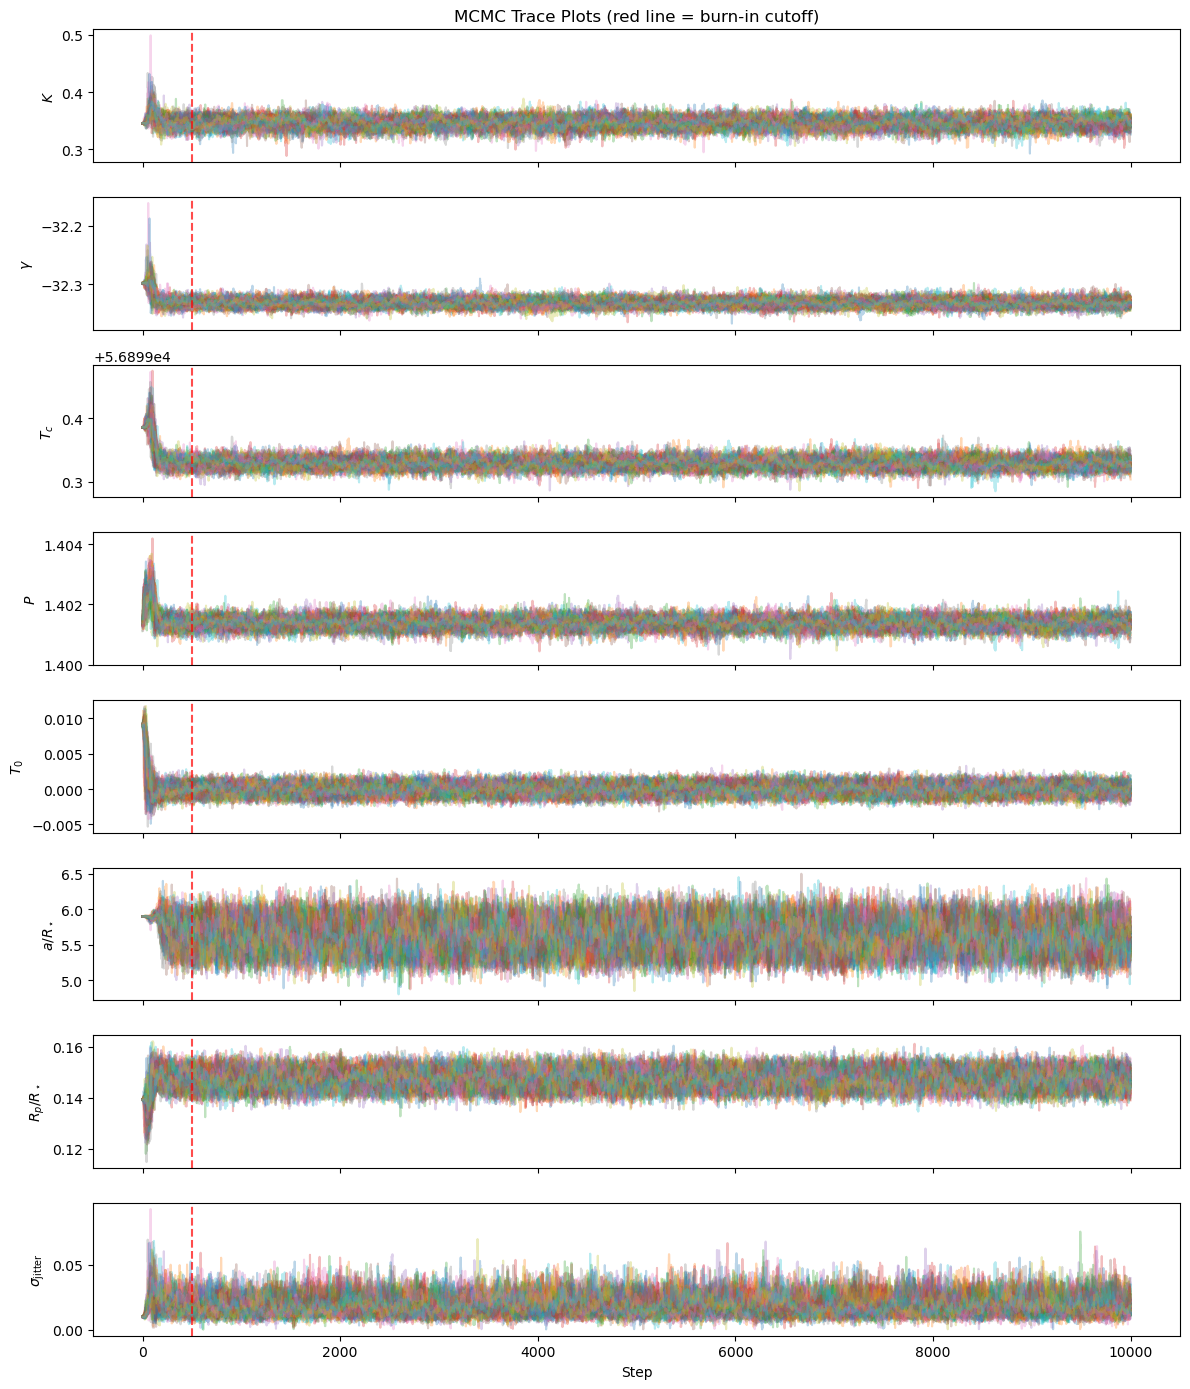

In [10]:
# Cell 8: Trace Plots (Convergence Check)

labels = [r"$K$", r"$\gamma$", r"$T_c$", r"$P$", r"$T_0$", r"$a/R_\star$", r"$R_p/R_\star$", r"$\sigma_\mathrm{jitter}$"]
chain = sampler.get_chain()

fig, axes = plt.subplots(ndim, 1, figsize=(12, 14), sharex=True)
for i in range(ndim):
    axes[i].plot(chain[:, :, i], alpha=0.3)
    axes[i].set_ylabel(labels[i])
    axes[i].axvline(500, color='r', linestyle='--', alpha=0.7)
axes[-1].set_xlabel("Step")
axes[0].set_title("MCMC Trace Plots (red line = burn-in cutoff)")
plt.tight_layout()
plt.show()

In [11]:
# Cell 9: Extract Results 
# Discard burn-in and thin chains
discard = 500
samples = sampler.get_chain(discard=discard, flat=True)

print(f"Number of samples: {len(samples)}")

labels_print = ["K (km/s)", "gamma (km/s)", "T_c (BJD-2400000)", "P (days)", 
                "T0 (days)", "a/Rs", "Rp/Rs", "jitter (km/s)"]

results = {}
print("\n" + "="*60)
print("JOINT FIT RESULTS")
print("="*60)
for i, label in enumerate(labels_print):
    q16, q50, q84 = np.percentile(samples[:, i], [16, 50, 84])
    results[label] = (q50, q84-q50, q50-q16)
    print(f"{label:20s} = {q50:.6f} +{q84-q50:.6f} -{q50-q16:.6f}")
print(f"{'b':20s} = {B_FIXED:.3f} (FIXED)")

# Store median values for plotting
K_med = results["K (km/s)"][0]
gamma_med = results["gamma (km/s)"][0]
T_c_med = results["T_c (BJD-2400000)"][0]
P_med = results["P (days)"][0]
T0_med = results["T0 (days)"][0]
aRs_med = results["a/Rs"][0]
RpRs_med = results["Rp/Rs"][0]
jitter_med = results["jitter (km/s)"][0]

Number of samples: 950000

JOINT FIT RESULTS
K (km/s)             = 0.346697 +0.006932 -0.007313
gamma (km/s)         = -32.331830 +0.005293 -0.005021
T_c (BJD-2400000)    = 56899.328920 +0.006264 -0.006176
P (days)             = 1.401377 +0.000142 -0.000141
T0 (days)            = -0.000054 +0.000688 -0.000685
a/Rs                 = 5.622278 +0.184658 -0.180306
Rp/Rs                = 0.147500 +0.003055 -0.003101
jitter (km/s)        = 0.017799 +0.006044 -0.004598
b                    = 0.800 (FIXED)


In [12]:
# Cell 10: Derived Parameters

# Inclination (using fixed b)
inc_med = np.degrees(np.arccos(B_FIXED / aRs_med))
inc_samples = np.degrees(np.arccos(B_FIXED / samples[:, 5]))
inc_16, inc_50, inc_84 = np.percentile(inc_samples, [16, 50, 84])

# Transit duration T14
def calc_T14(P, aRs, b, RpRs):
    sin_i = np.sqrt(1 - (b / aRs) ** 2)
    arg = np.sqrt((1 + RpRs) ** 2 - b ** 2) / (aRs * sin_i)
    arg = np.clip(arg, -1, 1)
    return ((P / np.pi) * np.arcsin(arg))/24

T14_samples = calc_T14(samples[:, 3], samples[:, 5], B_FIXED, samples[:, 6])
T14_16, T14_50, T14_84 = np.percentile(T14_samples, [16, 50, 84])

# Transit depth
depth_samples = samples[:, 6] ** 2
depth_16, depth_50, depth_84 = np.percentile(depth_samples, [16, 50, 84])

print("\n" + "="*60)
print("DERIVED PARAMETERS")
print("="*60)
print(f"{'Inclination (deg)':20s} = {inc_50:.4f} +{inc_84-inc_50:.4f} -{inc_50-inc_16:.4f}")
print(f"{'T14 (days)':20s} = {T14_50*24:.4f} +{(T14_84-T14_50)*24:.4f} -{(T14_50-T14_16)*24:.4f}")
print(f"{'Transit depth':20s} = {depth_50:.6f} +{depth_84-depth_50:.6f} -{depth_50-depth_16:.6f}")


DERIVED PARAMETERS
Inclination (deg)    = 81.8196 +0.2618 -0.2730
T14 (days)           = 0.0662 +0.0021 -0.0020
Transit depth        = 0.021756 +0.000910 -0.000905


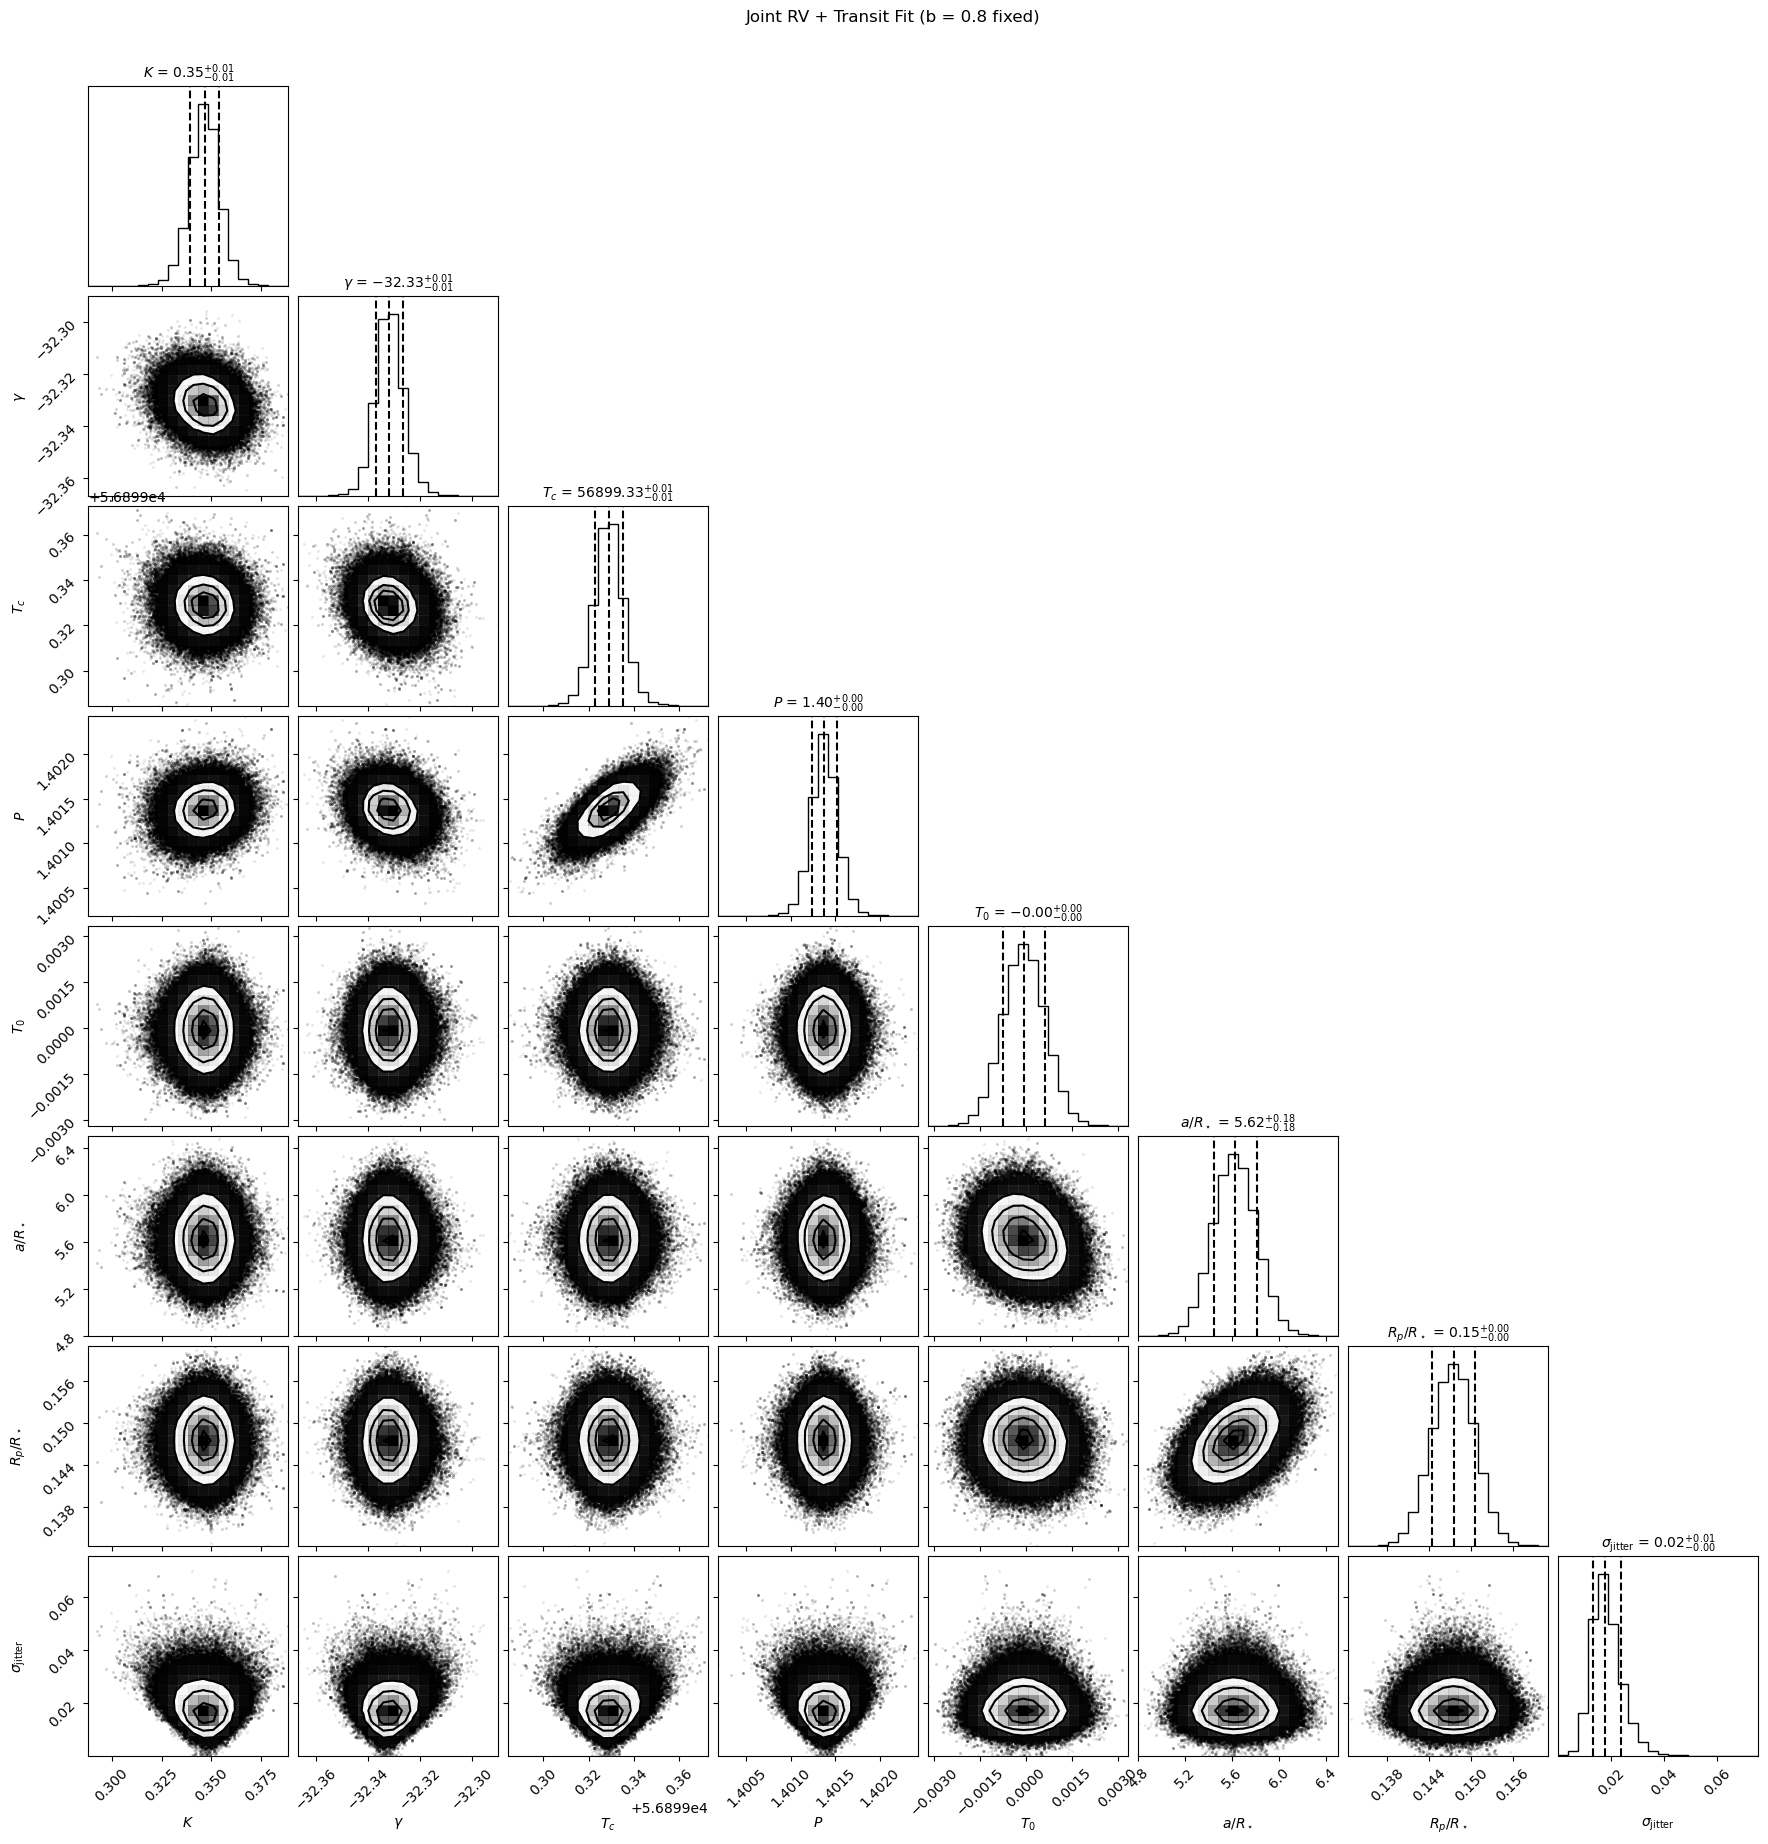

In [13]:
# Cell 11: Corner Plot

fig = corner.corner(
    samples,
    labels=[r"$K$", r"$\gamma$", r"$T_c$", r"$P$", r"$T_0$", r"$a/R_\star$", r"$R_p/R_\star$", r"$\sigma_\mathrm{jitter}$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 10}
)
fig.suptitle(f"Joint RV + Transit Fit (b = {B_FIXED} fixed)", y=1.02)
plt.show()

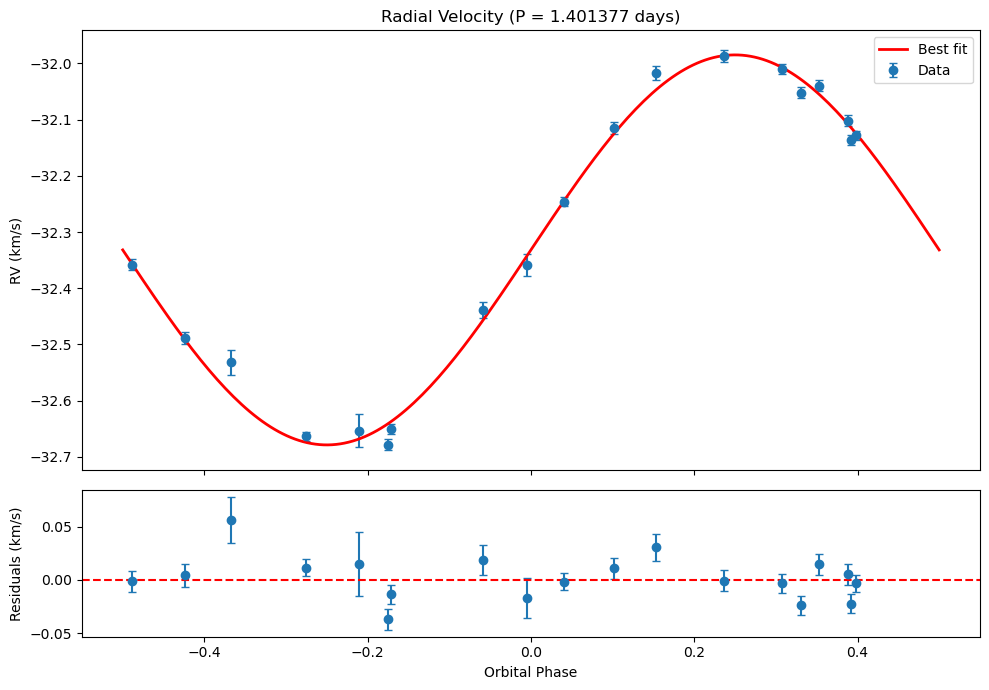

RV reduced chi-squared: 1.07


In [14]:
# Cell 12: RV Plot with Best Fit

# Phase-fold RV data
phase_rv = ((t_rv - T_c_med) / P_med) % 1
# Shift phases > 0.5 to negative for better visualization
phase_rv[phase_rv > 0.5] -= 1

# Model curve
phase_model = np.linspace(-0.5, 0.5, 200)
rv_model_curve = K_med * np.sin(2 * np.pi * phase_model) + gamma_med

# Best fit at data points
rv_best = rv_model(t_rv, K_med, gamma_med, T_c_med, P_med)

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True,
                          gridspec_kw={'height_ratios': [3, 1]})

# Top: data and model
axes[0].errorbar(phase_rv, rv, yerr=rv_err, fmt='o', ms=6, capsize=3, label='Data')
axes[0].plot(phase_model, rv_model_curve, 'r-', lw=2, label='Best fit')
axes[0].set_ylabel('RV (km/s)')
axes[0].legend()
axes[0].set_title(f'Radial Velocity (P = {P_med:.6f} days)')

# Bottom: residuals
axes[1].errorbar(phase_rv, rv - rv_best, yerr=rv_err, fmt='o', ms=6, capsize=3)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_xlabel('Orbital Phase')
axes[1].set_ylabel('Residuals (km/s)')

plt.tight_layout()
plt.show()

#RV chi squared
chi2_rv = np.sum(((rv - rv_best) / ((rv_err**2 + jitter_med**2) ** 0.5))**2)
print(f"RV reduced chi-squared: {chi2_rv / (len(rv) - 5):.2f}")  

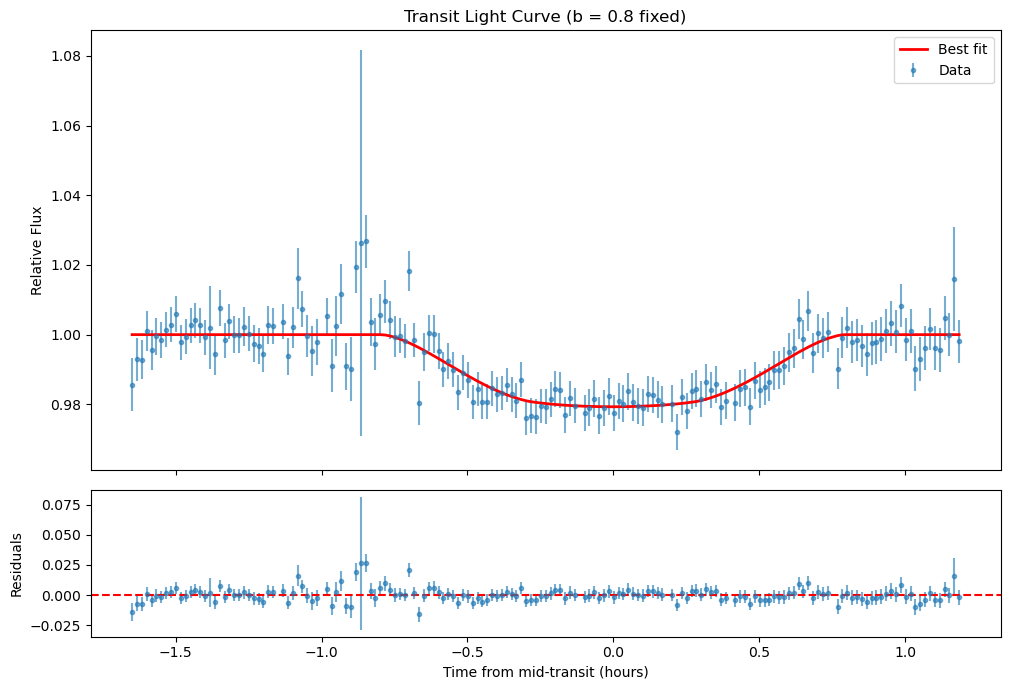

Transit reduced chi-squared: 0.76
Residual RMS: 0.005883


In [15]:
# Cell 13: Transit Plot with Best Fit

# Best-fit transit model (now without b parameter)
transit_best = transit_model(t_transit, T0_med, P_med, aRs_med, RpRs_med)
residuals_transit = flux - transit_best

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True,
                          gridspec_kw={'height_ratios': [3, 1]})

# Top: data and model
axes[0].errorbar(t_transit * 24, flux, yerr=ferr, fmt='o', ms=3, alpha=0.6, label='Data')
axes[0].plot(t_transit * 24, transit_best, 'r-', lw=2, label='Best fit')
axes[0].set_ylabel('Relative Flux')
axes[0].legend()
axes[0].set_title(f'Transit Light Curve (b = {B_FIXED} fixed)')

# Bottom: residuals
axes[1].errorbar(t_transit * 24, residuals_transit, yerr=ferr, fmt='o', ms=3, alpha=0.6)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_xlabel('Time from mid-transit (hours)')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Transit chi-squared
chi2_transit = np.sum((residuals_transit / ferr) ** 2)
print(f"Transit reduced chi-squared: {chi2_transit / (len(flux) - 3):.2f}")
print(f"Residual RMS: {np.std(residuals_transit):.6f}")

In [ ]:
# Cell 14: Planet Mass Calculation

# Constants
G = 6.674e-11       # m^3 kg^-1 s^-2
M_sun = 1.989e30    # kg
M_jup = 1.898e27    # kg
R_sun = 6.957e8     # m
R_jup = 6.991e7     # m

# Stellar mass (from literature or your colour analysis)
M_star = 0.82 * M_sun  # kg - from colour analysis

# Calculate planet mass from K
K_SI = K_med * 1000  # km/s -> m/s
P_SI = P_med * 86400  # days -> s
inc_rad = np.radians(inc_med)

# M_p * sin(i) = K * (P / 2πG)^(1/3) * M_star^(2/3)
Mp_sini = K_SI * (P_SI / (2 * np.pi * G)) ** (1/3) * M_star ** (2/3)
Mp = Mp_sini / np.sin(inc_rad)

# Planet radius
R_star = 0.783 * R_sun  # from colour analysis
Rp = RpRs_med * R_star

# Semi major acis a = aRs_med * R_star
a = aRs_med * R_star * 0.00465046726

print("\n" + "="*60)
print("PLANETARY PARAMETERS")
print("="*60)
print(f"K              = {K_med:.3f} km/s")
print(f"Inclination    = {inc_med:.2f} deg")
print(f"M_p sin(i)     = {Mp_sini/M_jup:.3f} M_Jup")
print(f"M_p            = {Mp/M_jup:.3f} M_Jup")
print(f"R_p            = {Rp/R_jup:.3f} R_Jup")
print(f"a              = {a/R_sun:.3f} au")


PLANETARY PARAMETERS
K              = 0.347 km/s
Inclination    = 81.82 deg
M_p sin(i)     = 1.673 M_Jup
M_p            = 1.690 M_Jup
R_p            = 1.149 R_Jup
a              = 0.020 R_sun


In [ ]:
# Example: uniform distribution for M_star and R_star
M_star_range = [0.76, 0.82]  # in solar masses
R_star_range = [0.76, 0.81]  # in solar radii

# Convert to SI units
M_star_samples = np.random.uniform(M_star_range[0], M_star_range[1], size=len(samples)) * M_sun
R_star_samples = np.random.uniform(R_star_range[0], R_star_range[1], size=len(samples)) * R_sun

# Calculate planet mass and radius for each sample
K_samples = samples[:, 0] * 1000  # km/s to m/s
P_samples = samples[:, 3] * 86400 # days to s
inc_samples_rad = np.radians(np.degrees(np.arccos(B_FIXED / samples[:, 5])))
RpRs_samples = samples[:, 6]

Mp_sini_samples = K_samples * (P_samples / (2 * np.pi * G)) ** (1/3) * M_star_samples ** (2/3)
Mp_samples = Mp_sini_samples / np.sin(inc_samples_rad)
Mp_samples = Mp_samples / M_jup  # to Jupiter masses

Rp_samples = RpRs_samples * R_star_samples / R_jup  # to Jupiter radii

# Calculate semi-major axis for each sample
a_samples = samples[:, 5] * R_star_samples  # to au
a_samples = a_samples * 0.00465046726 # to R_sun

# Get percentiles
Mp_16, Mp_50, Mp_84 = np.percentile(Mp_samples, [16, 50, 84])
Rp_16, Rp_50, Rp_84 = np.percentile(Rp_samples, [16, 50, 84])
a_16, a_50, a_84 = np.percentile(a_samples, [16, 50, 84])
print(f"Planet mass (M_Jup): {Mp_50:.3f} +{Mp_84-Mp_50:.3f} -{Mp_50-Mp_16:.3f}")
print(f"Planet radius (R_Jup): {Rp_50:.3f} +{Rp_84-Rp_50:.3f} -{Rp_50-Rp_16:.3f}")
print(f"Semi-major axis (au): {a_50:.3f} +{a_84-a_50:.3f} -{a_50-a_16:.3f}")

Planet mass (M_Jup): 1.648 +0.042 -0.043
Planet radius (R_Jup): 1.152 +0.033 -0.032
Semi-major axis (Au): 14275875.249 +544223.747 -527380.575


Inclination (deg)             = 81.8213 +0.2612 -0.2701
T14 (days)                    = 0.0662 +0.0021 -0.0020
Transit depth (Rp/Rs)^2       = 0.021736 +0.000920 -0.000901

Planet mass (M_Jup) = 1.647 +0.043 -0.043
Planet radius (R_Jup) = 1.151 +0.033 -0.032

K (km/s)             = 0.346573 +0.007031 -0.007342
gamma (km/s)         = -32.331765 +0.005320 -0.005050
T_c (BJD-2400000)    = 56899.328914 +0.006332 -0.006109
P (days)             = 1.401380 +0.000143 -0.000142
T0 (days)            = -0.000050 +0.000693 -0.000682
a/Rs                 = 5.623456 +0.184257 -0.178563
Rp/Rs                = 0.147430 +0.003088 -0.003089
jitter (km/s)        = 0.017819 +0.005968 -0.004647
b                    = 0.800 (FIXED)


theres absolutely no difference between fix and sample b so cant decide between the two at all. discussion stuff